You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.

2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

Dataset Link-

•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv

•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv


In [164]:
# IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as sp

In [165]:
# read & store the data in DF from train.csv

df_raw = pd.read_csv(' https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df_raw.head(4)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes


# Non Graphical Analysis

In [167]:
# Check the dimensions & info of the dataFrame

print(df_raw.shape)
df_raw.info()

(31647, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


ID is just serial number & can be dropped,
Found no null valuess

In [168]:
# Drop Id & revisit the info & shape

df_raw.drop('ID', axis=1, inplace = True)
print(df_raw.shape)

df_raw.info()

(31647, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [169]:
df_raw.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

<Axes: >

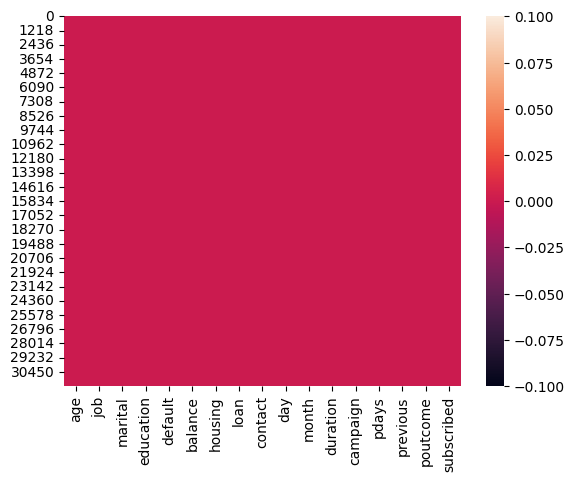

In [170]:
# Visualize non null values using heat-map

sns.heatmap(df_raw.isnull())

No null found

In [171]:
# Finding the number of unique values in a column

for index in df_raw.columns.to_list():

  print(index,':', df_raw[index].nunique())

age : 76
job : 12
marital : 3
education : 4
default : 2
balance : 6326
housing : 2
loan : 2
contact : 3
day : 31
month : 12
duration : 1454
campaign : 45
pdays : 509
previous : 38
poutcome : 4
subscribed : 2


Job, marital, education, default, housing, loan, contact, month, poutcome & subscribed needs to encoded

In [172]:
# Encoding the independent labels using LabelEncoder

from sklearn.preprocessing import LabelEncoder

enc_list =['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'poutcome', 'subscribed']
le = LabelEncoder()

for index in enc_list:

  df_raw[index] = le.fit_transform(df_raw[index])

df_raw.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0


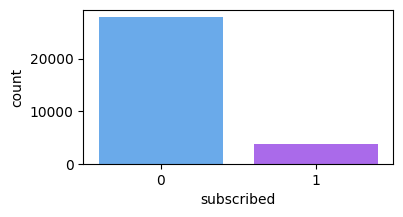

0    27932
1     3715
Name: subscribed, dtype: int64


In [173]:
# checking unique value count

mp.figure(figsize=(4,2))
sns.countplot(x=df_raw['subscribed'], palette = 'cool')
mp.show()

print(df_raw['subscribed'].value_counts())

**Clearly the data is not balanced, performing SMOTE to balance the data**

In [174]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X = df_raw.iloc[:,:-1]
y = df_raw['subscribed']

print(X.shape)
print(y.shape)

X_resampled, y_resampled = smote.fit_resample(X, y)

print(X_resampled.shape)
print(y_resampled.shape)


df_mp_bl = pd.DataFrame(data = X_resampled, columns = df_raw.columns.to_list())
df_mp_bl['subscribed'] = y_resampled

print(df_mp_bl.shape)

df_mp_bl.sample(4)

(31647, 16)
(31647,)
(55864, 16)
(55864,)
(55864, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
35448,40,2,1,2,0,462,0,0,0,17,10,514,2,166,3,2,1
5774,51,0,1,1,0,1535,0,1,0,20,9,365,1,-1,0,3,0
31835,38,4,0,1,0,1967,0,0,0,18,8,655,1,-1,0,3,1
47120,36,3,1,1,0,0,1,0,0,10,8,655,1,-1,0,3,1


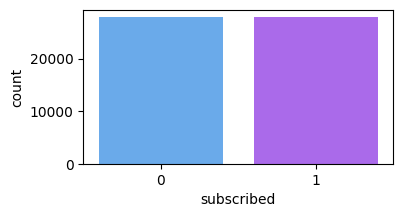

0    27932
1    27932
Name: subscribed, dtype: int64


In [175]:
# checking subscribed count after applying SMOTE
mp.figure(figsize=(4,2))
sns.countplot(x=df_mp_bl['subscribed'], palette = 'cool')
mp.show()

print(df_mp_bl['subscribed'].value_counts())

**Data is balanced**

# GRAPHICAL ANALYSIS

UNIVARIATE

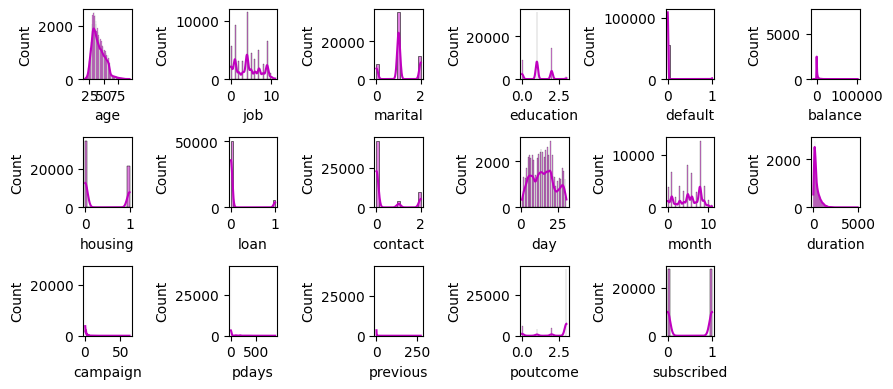

In [176]:
mp.figure(figsize=(9,4))
pnum = 1

for index in df_mp_bl.columns.to_list():
  if(pnum<=17):
    ax = mp.subplot(3,6, pnum)
    sns.histplot(df_mp_bl[index], kde = True, color = 'm')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Data is slightly skewed

In [177]:
# Checking Skewness

df_mp_bl.skew()

age            0.749581
job            0.226853
marital       -0.032425
education      0.210295
default        9.189135
balance        7.301395
housing        0.482773
loan           2.733417
contact        1.402429
day            0.145805
month         -0.304782
duration       2.149338
campaign       5.451419
pdays          2.380136
previous      35.739961
poutcome      -1.545034
subscribed     0.000000
dtype: float64

Applying Cuberoot transformation where skewness is above permissible limit

In [178]:
for index in df_mp_bl.columns.to_list():

  if (np.abs(df_mp_bl[index].skew()) >1):
    df_mp_bl[index] = np.cbrt(df_mp_bl[index])

df_mp_bl.skew()

age           0.749581
job           0.226853
marital      -0.032425
education     0.210295
default       9.189135
balance      -0.120415
housing       0.482773
loan          2.733417
contact       1.201443
day           0.145805
month        -0.304782
duration      0.447539
campaign      1.827199
pdays         1.211217
previous      1.474628
poutcome     -2.181265
subscribed    0.000000
dtype: float64

Skewness in some of the labels is reduced using cuberoot transformation

**BIVARIATE ANALYSIS**

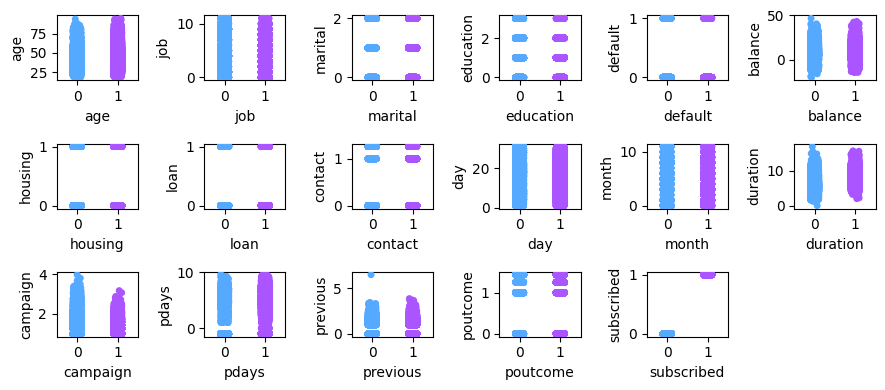

In [179]:
mp.figure(figsize=(9,4))
pnum = 1

for index in df_mp_bl.columns.to_list():
  if(pnum<=17):
    ax = mp.subplot(3,6, pnum)
    sns.stripplot(x=df_mp_bl['subscribed'], y =df_mp_bl[index], palette = 'cool')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

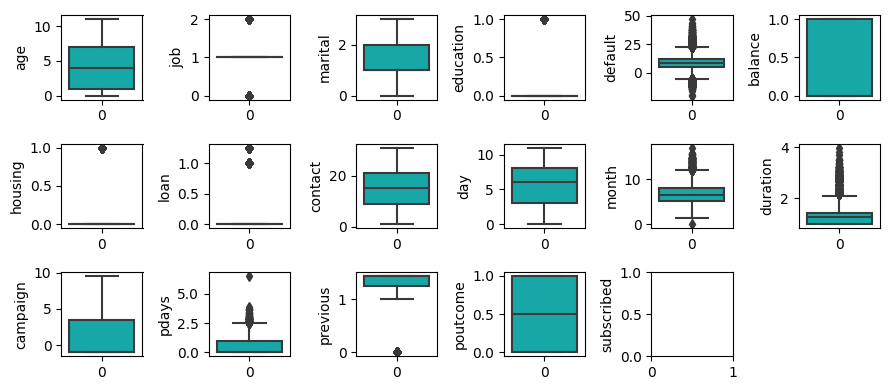

In [180]:
# box plot to visulaize outliers

mp.figure(figsize=(9,4))
pnum = 1

for index in df_mp_bl.columns.to_list():
  if(pnum<=17):
    sns.boxplot(df_mp_bl[index], color = 'c')
    ax = mp.subplot(3,6,pnum)
    mp.ylabel(index)
  pnum = pnum+1
  mp.tight_layout()

mp.show()

Probable Outliers in default, duration

Checking Z-score and remove outliers

(48218, 17)


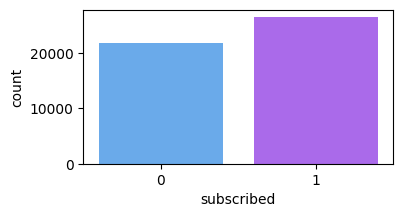

1    26458
0    21760
Name: subscribed, dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
11863,48,1,1,0,0.0,8.410833,0,0.0,0.0,24,5,7.741753,1.000000,-1.000000,0.000000,1.44225,0
53964,45,9,0,1,0.0,13.033444,0,0.0,0.0,18,8,9.582840,1.000000,-1.000000,0.000000,1.44225,1
40037,35,7,1,1,0.0,11.941848,0,0.0,0.0,7,8,5.614672,1.259921,4.414005,1.259921,1.00000,1


In [181]:
# Removing Outliers where |Z-score| > 3

df_features = df_mp_bl.iloc[:,:-1]
df_target =  df_mp_bl['subscribed']
df_mp_zs = df_mp_bl[(np.abs(sp.zscore(df_features)) <= 3).all(axis=1)]

print(df_mp_zs.shape)

mp.figure(figsize=(4,2))
sns.countplot(x = df_mp_zs['subscribed'], palette = 'cool')
mp.show()
print(df_mp_zs['subscribed'].value_counts())

df_mp_zs.sample(3)

Outliers removed

<Axes: >

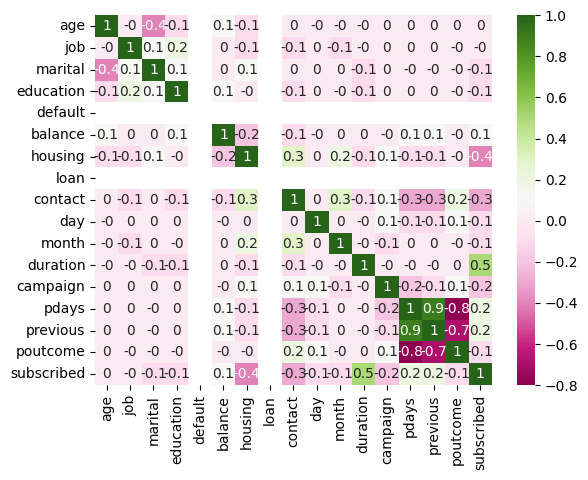

In [182]:
# heatmap & correlation to understand relation between the 2 independent variables

sns.heatmap(round(df_mp_zs.corr(),1), cmap = 'PiYG', annot = True)

Strong +ve Correlation between pdays & previous

-ve correlation of poutcome & pdays, previous



Removed Outliers using Z-score, data got slightly imbalanced but within acceptable limits

In [183]:
# Checking Skewness after removing outliers

df_mp_zs.skew()

age           0.575917
job           0.216159
marital      -0.033568
education     0.205930
default       0.000000
balance      -0.198446
housing       0.581428
loan          0.000000
contact       1.300088
day           0.164880
month        -0.281309
duration      0.370983
campaign      1.152412
pdays         1.146356
previous      1.297283
poutcome     -2.145210
subscribed   -0.195803
dtype: float64

:Cuberoot Transformation has reduced the skewness within permissible limits

In [184]:
# Checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

df_feat = df_mp_zs.iloc[:,:-1]
vif = pd.DataFrame()
vif['Feature'] = df_feat.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_feat.values,i) for i in range(len(df_feat.columns))]

vif

,Feature,VIF Val
0,age,14.952933
1,job,3.211491
2,marital,4.479867
3,education,3.824027
4,default,NaN
5,balance,3.217083
6,housing,1.831901
7,loan,NaN
8,contact,1.698800
9,day,4.831837


VIF high for campaign, dropping the column

In [185]:
df_feat.drop('campaign', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_feat.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_feat.values,i) for i in range(len(df_feat.columns))]
print(df_feat.shape)
vif

(48218, 15)


,Feature,VIF Val
0,age,13.317192
1,job,3.195309
2,marital,4.288649
3,education,3.767993
4,default,NaN
5,balance,3.217016
6,housing,1.777141
7,loan,NaN
8,contact,1.693929
9,day,4.646681


In [186]:
df_feat.drop('poutcome', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_feat.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_feat.values,i) for i in range(len(df_feat.columns))]

vif

,Feature,VIF Val
0,age,10.845295
1,job,3.174940
2,marital,4.009369
3,education,3.704726
4,default,NaN
5,balance,3.207437
6,housing,1.776819
7,loan,NaN
8,contact,1.692951
9,day,4.558095


Remaining Columns VIF are close to acceptable limits, training the model via training dataset

Separate independent, target labels for training dataset

In [187]:
# Separate independent & target labels

x_df = df_feat
y_df = df_mp_zs['subscribed']

# Import Libraraies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print(x_df.shape)
print(y_df.shape)

print(x_df.sample(3))
print(y_df.sample(3))

(48218, 14)
(48218,)
       age  job  marital  education  default    balance  housing  loan  \
50287   62    3        1          1      0.0  15.333281        0   0.0   
23653   50    7        0          1      0.0   6.349604        1   0.0   
31619   59    5        1          3      0.0   0.000000        0   0.0   

        contact  day  month  duration   pdays  previous  
50287  0.000000   15      8  7.791488  6.2488  1.587401  
23653  1.259921   19      8  6.811285 -1.0000  0.000000  
31619  1.259921    8      8  7.518473 -1.0000  0.000000  
42144    1
1890     0
2074     0
Name: subscribed, dtype: int64


# Modelling

Hypertuning Random Forest Classifier Model

In [189]:
# Import required libraries

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

# Call the RFC model classifier & define parameters

rfc = RandomForestClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 60)}

samples = 8
randomCV = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_rfc = randomCV.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 5, 'random_state': 37}


In [190]:
# Training the RFC Model with given best hypertuning parameters found for various random state

RFC = RandomForestClassifier(criterion = bp_rfc['criterion'], max_depth = bp_rfc['max_depth'], max_features = bp_rfc['max_features'],
                             min_samples_split = bp_rfc['min_samples_split'], random_state =bp_rfc['random_state'])
max_acc = 0
max_rand_st = 0

for i in range(0,60):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  RFC.fit(x_train, y_train)
  pred = RFC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 51 with accuracy score: 0.932082123600166


Random Forest Classifiers gave accuracy score of 0.93 at randome state = 51 for at best hypertuned parameters

Hypertuning Extra Trees Classifier Model

In [191]:
# Import Extratree library

from sklearn.tree import ExtraTreeClassifier

# Create instance of ExtraTreeClassifier

etc = ExtraTreeClassifier()

param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 60)}

samples = 8
randomCV = RandomizedSearchCV(etc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_etc = randomCV.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 7, 'random_state': 99}


In [192]:
# Training the ETC  Model with given best hypertuning parameters

ETC = ExtraTreeClassifier(criterion = bp_etc['criterion'], max_depth = bp_etc['max_depth'], max_features = bp_etc['max_features'], min_samples_split = bp_etc['min_samples_split'], random_state = bp_etc['random_state'] )
max_acc = 0
max_rand_st = 0

for i in range(0,60):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  ETC.fit(x_train, y_train)
  pred = ETC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 42 with accuracy score: 0.8857320613853173


Extra Tree Classifiers gave accuracy score of 0.88 at randome state = 42 at best hypertuned parameters






Hypertuning Decision Tree Classifiers

In [197]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 60)}

samples = 8
randomCV = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_dtc = randomCV.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 12, 'min_samples_split': 3, 'random_state': 36}


In [198]:
# Training the DTC  Model with given best hypertuning parameters

DTC = DecisionTreeClassifier(criterion = bp_dtc['criterion'], max_depth = bp_dtc['max_depth'], max_features = bp_dtc['max_features'],
                             min_samples_split = bp_dtc['min_samples_split'], random_state = bp_dtc['random_state'] )
max_acc = 0
max_rand_st = 0

for i in range(0,60):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  DTC.fit(x_train, y_train)
  pred = DTC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 1 with accuracy score: 0.8980713396930734



Decision Tree Classifier gave accuracy of 0.89 for best hypertuned parameters








Hypertuning K Neighbors Classifier Model

In [195]:
# Import KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

param = {"n_neighbors": [3,5,7],
   "weights": ['uniform', 'distance'],
   "p": [1,2]}

samples = 8
randomCV = RandomizedSearchCV(knc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_knc = randomCV.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 5}


In [196]:
# Training KNN Model with best hypertuned parameters

max_acc = 0
max_rand_st = 0
KNN = KNeighborsClassifier(weights = bp_knc['weights'], p = bp_knc['p'], n_neighbors = bp_knc['n_neighbors'])

for i in range(0,60):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 57 with accuracy score: 0.9047075902115305


KNN gives max accuracy of 0.90  for best hypertuned parameters



Hypertuning Parameters for ADABOOST CLASSIFIER

In [199]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

param = {"n_estimators": sp_randint(1, 100),
   "learning_rate": sp_randint(1, 15),
   "algorithm": ['SAMME.R', 'SAMME'],
    "random_state" : range(0, 60)}

samples = 8
randomCV = RandomizedSearchCV(abc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_abc = randomCV.best_params_


{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 22, 'random_state': 27}


In [200]:
# Training ABC Model

max_acc = 0
max_rand_st = 0
ABC = AdaBoostClassifier(n_estimators = bp_abc['n_estimators'], learning_rate = bp_abc['learning_rate'],
                         algorithm = bp_abc['algorithm'],random_state = bp_abc['random_state'] )

for i in range(0,60):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  ABC.fit(x_train, y_train)
  pred = ABC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 57 with accuracy score: 0.8682082123600166


ABC gives accuracy of 0.86 for best hyperuned parameter




# Checking accuracy scores & other parameters of the best model

RandomForestClassifier {'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 5, 'random_state': 37}



Random State for training testing model = 51


In [201]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix

RFC_SEL = RandomForestClassifier(criterion = bp_rfc['criterion'], max_features = bp_rfc['max_features'], min_samples_split = bp_rfc['min_samples_split'],
                                 random_state = bp_rfc['random_state'])

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = 57, test_size = 0.2)
RFC_SEL.fit(x_train, y_train)
pred = RFC_SEL.predict(x_test)

acc_score = accuracy_score(y_test, pred)
print('Accuracy of the Model:', round(acc_score,4))
print('\n')

print('Confusion Matrix:', '\n',confusion_matrix(y_test, pred))
print('\n')

print('Classification Report:', '\n',classification_report(y_test, pred))
print('\n')

Accuracy of the Model: 0.9285


Confusion Matrix: 
 [[3854  471]
 [ 219 5100]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      4325
           1       0.92      0.96      0.94      5319

    accuracy                           0.93      9644
   macro avg       0.93      0.92      0.93      9644
weighted avg       0.93      0.93      0.93      9644





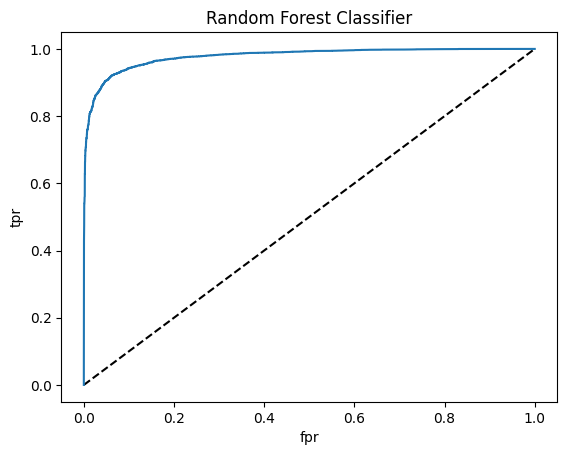

In [202]:
# Checking ROC_AUC Curve

# Checking AUC & ROC

y_pred_prob = RFC_SEL.predict_proba(x_test)[:, 0]

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob, pos_label = 0)

import matplotlib.pyplot as mpp

mp.plot([0,1],[0,1], 'k--')
mp.xlabel('fpr')
mp.ylabel('tpr')
mp.title('Random Forest Classifier')
mp.plot(fpr,tpr)
mp.show()

AUC-ROC Curve indicates the model is well fitted, but has some inaccurate prediction

# SAVING THE MODEL

In [203]:
# Saving the best performing Model

import joblib

joblib.dump(RFC_SEL, 'RFC_BM_PRED.pkl')

['RFC_BM_PRED.pkl']

# CHECKING THE SAVED MODEL

In [204]:
# Load the saved model

load_BM_PRED = joblib.load('RFC_BM_PRED.pkl')

BMF = load_BM_PRED

In [205]:
# Function to predict will subscribe or not

def pred_subsc(input):
  inp = np.array(input)
  type_bm  =  BMF.predict(inp.reshape(1, -1))

  if (type_bm == 0):
    k = "May Not Subscribe"

  elif (type_bm == 1):
    k = "May Subscribe"

  else:
    k = 'Cant Say'

  return type_bm

In [206]:
# Data for verification of model prediction

bm_Data = x_df
bm_Data['subscribed'] = y_df

bm_Data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,pdays,previous,subscribed
0,56,0,1,3,0.0,12.456918,0,0.0,1.0,19,9,3.530348,-1.000000,0.00000,0
1,31,11,1,1,0.0,1.442250,0,0.0,0.0,20,5,4.497941,-1.000000,0.00000,0
2,27,7,1,1,0.0,9.622603,1,0.0,0.0,18,5,6.214465,-1.000000,0.00000,0
3,57,4,0,2,0.0,14.868480,0,0.0,0.0,22,6,9.535417,4.379519,1.44225,1
4,31,9,1,1,0.0,4.918685,1,0.0,0.0,4,3,7.243156,-1.000000,0.00000,0


In [207]:
print(x_df.shape)
x_df.head(2)

(48218, 15)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,pdays,previous,subscribed
0,56,0,1,3,0.0,12.456918,0,0.0,1.0,19,9,3.530348,-1.0,0.0,0
1,31,11,1,1,0.0,1.442250,0,0.0,0.0,20,5,4.497941,-1.0,0.0,0


In [208]:
# Checking Prediction

rws = [0, 1, 2, 3, 4]
for row in rws:
  print('Actual:', y_df.iloc[row] , 'Predicted by Model:', pred_subsc(x_df.iloc[row,:-1]))
  print('\n')

Actual: 0 Predicted by Model: [0]


Actual: 0 Predicted by Model: [0]


Actual: 0 Predicted by Model: [0]


Actual: 1 Predicted by Model: [1]


Actual: 0 Predicted by Model: [0]




**MODEL SEEMS TO BE PREDICTING ACCURATELY**

**Import test data in dataframe and predict the outcome**

In [209]:
df_test = pd.read_csv(' https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
df_test.head(4)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown


In [210]:
# Drop the columns : ID, campaign, poutcome
# Encode job, marital education, default, housing, loan, cellular, month

df_test.drop(['ID','campaign', 'poutcome'], axis=1, inplace = True)

enct_list =['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month']

for index in enct_list:

  df_test[index] = le.fit_transform(df_test[index])

df_test.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,pdays,previous
0,32,7,1,1,0,118,1,0,0,15,8,20,-1,0
1,78,5,0,0,0,2787,0,0,1,1,5,372,-1,0
2,31,6,2,2,0,144,1,0,2,16,8,676,-1,0


In [211]:
# Check the shape of test dataset

df_test.shape

(13564, 14)

In [212]:
tst_output = []

rows  = range(0, df_test.shape[0])

for i in rows:

  k = pred_subsc(df_test.iloc[i,:])

  if (k == 0):
    tst_output.append("NO")

  else:
    tst_output.append("YES")



In [213]:
# Appedn the output in dataframe

df_out = pd.read_csv(' https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

df_out['Subscribe'] = pd.DataFrame(data = tst_output)

df_out.head(3)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribe
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown,YES
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown,NO
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown,NO


In [214]:
# Write the data in csv file and save

df_out.to_csv('test_res.csv')